In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.express as px
import sklearn.model_selection
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import QuantileTransformer, OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV




RANDOM_STATE = 42
DATASET_YEAR = 2010





In [19]:
train_df = pd.read_csv('../Data/Raw/train.csv')
test_df = pd.read_csv('../Data/Raw/test.csv')

In [20]:
target_column = 'SalePrice'
y=train_df[target_column]

y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [21]:
# How many numerical columns is there in this dataset?
# Select numerical columns only for numerical_df
# Tips: You can use select_dtypes in pandas to filter out numerical columns
numerical_train = train_df.select_dtypes (include = 'number')
numerical_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [22]:
# Feature engineering - Encode non numerical columns
# How many categorical columns is there in this dataset?
# Tips: You can use select_dtypes in pandas to filter out numerical columns
categorical_df = train_df.select_dtypes(exclude='number')
categorical_features = categorical_df.columns
categorical_df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [24]:
# One Hot encode
# Tips: You can either use SKlearn OneHotEncoder (but the .transform method will be a sparse matrix not a dataframe)
# or you can use get_dummies method from pandas

ohe_df=  pd.get_dummies (categorical_df)
ohe_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
# Feature engineering - transform numerical columns (at least log transform on area features)
# Find all areas features
area_features = [col for col in numerical_train.columns if 'Porch' in col or 'SF' in col or 'Area' in col]
area_features

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea']

LotArea


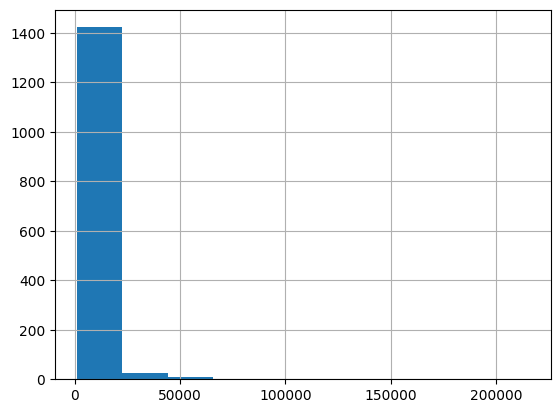

MasVnrArea


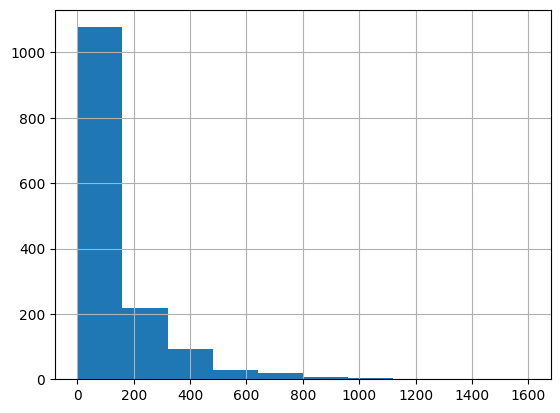

BsmtFinSF1


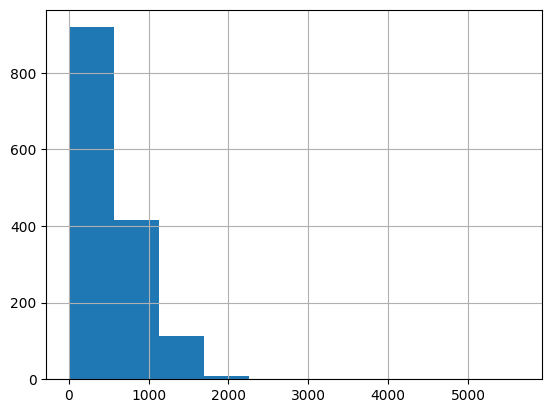

BsmtFinSF2


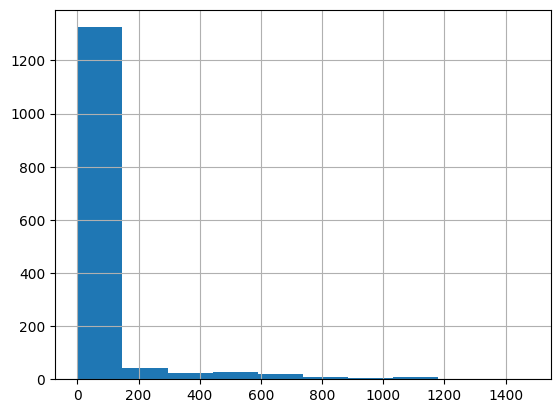

BsmtUnfSF


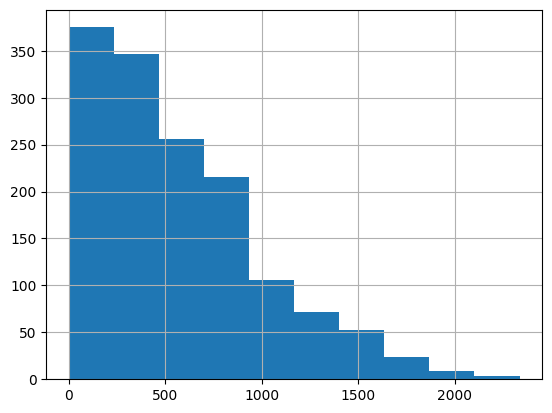

TotalBsmtSF


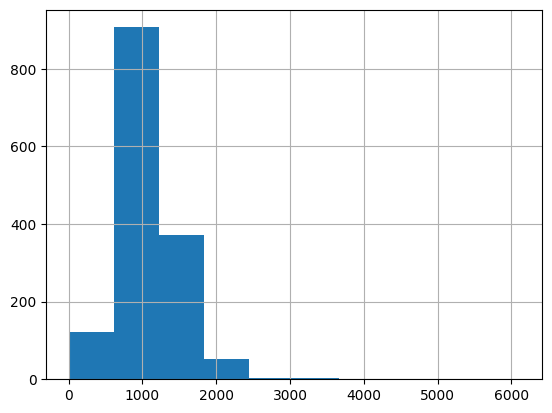

1stFlrSF


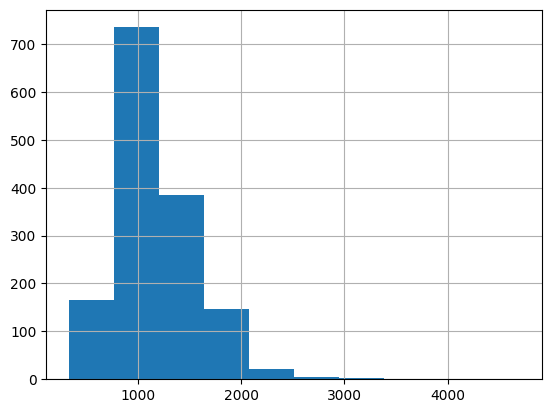

2ndFlrSF


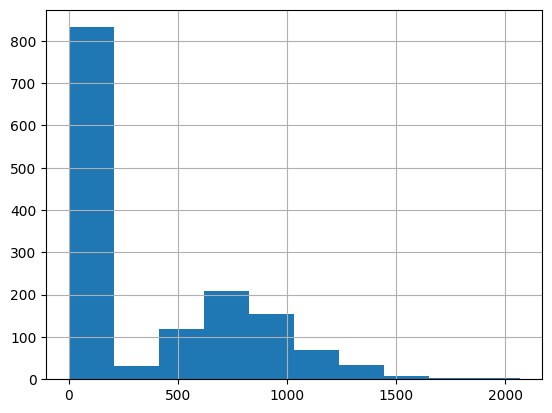

LowQualFinSF


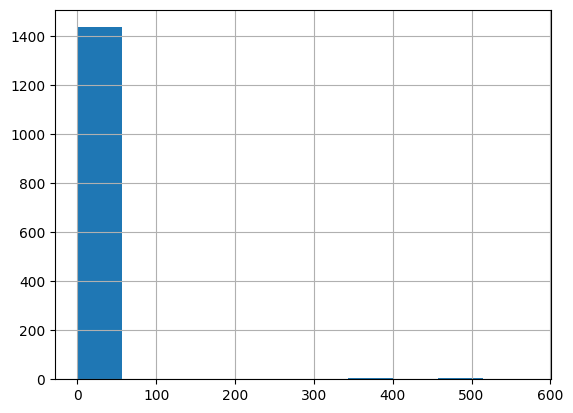

GrLivArea


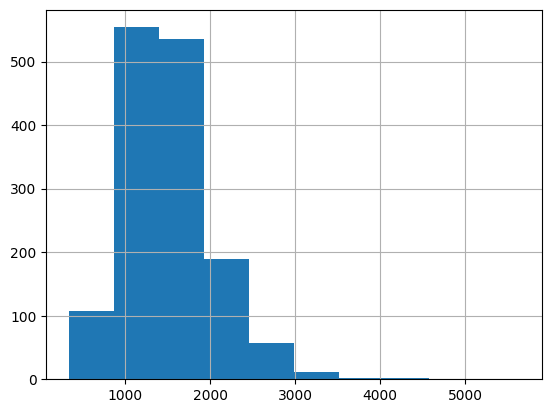

GarageArea


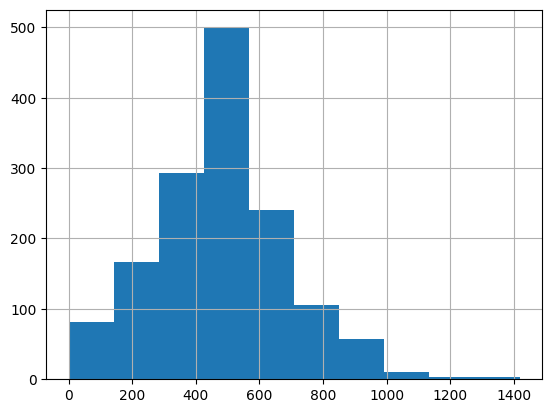

WoodDeckSF


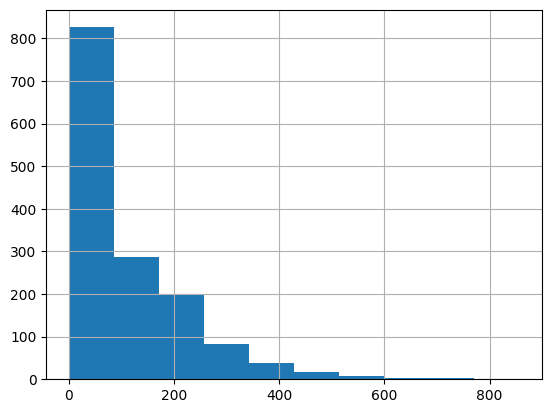

OpenPorchSF


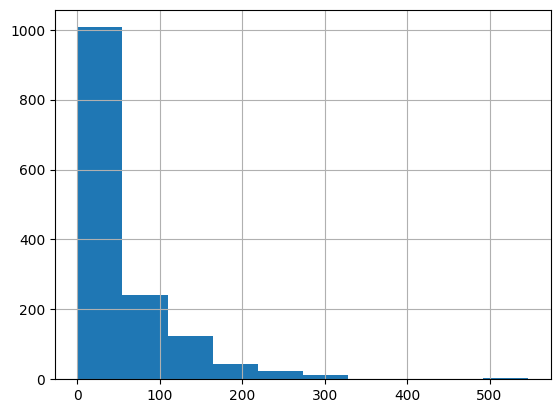

EnclosedPorch


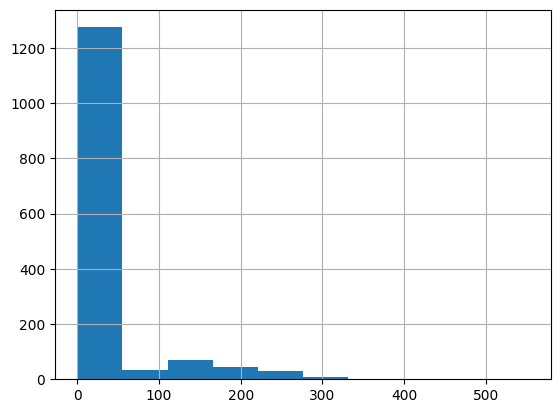

3SsnPorch


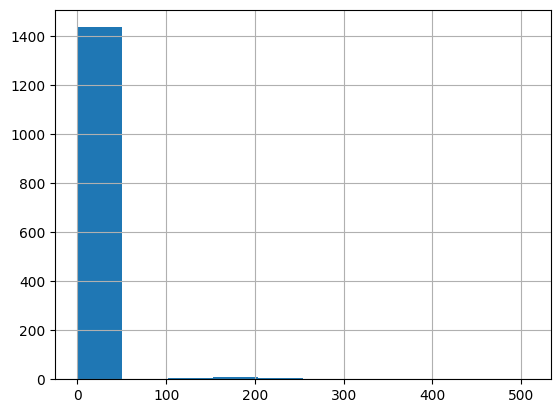

ScreenPorch


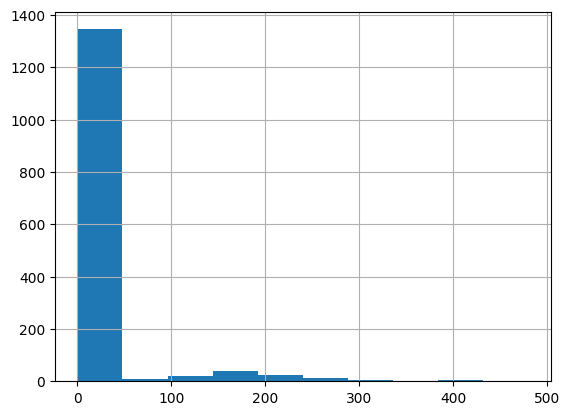

PoolArea


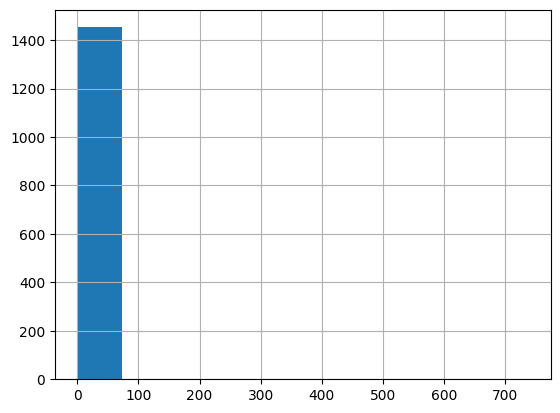

In [26]:
# For each area feature, plot their distribution in a histogram
for feature in area_features:
  print(feature)
  train_df[feature].hist()
  plt.show()

In [27]:
(train_df[area_features]<0).sum(axis=0)

LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
dtype: int64

In [28]:
# For each area feature, create a new feature with _log suffix, with the value the np.log of the original value
for feature in area_features:
  train_df[feature+'_log']= np.log(train_df[feature] + 1)
  test_df[feature+'_log']= np.log(test_df[feature] + 1)

<Axes: >

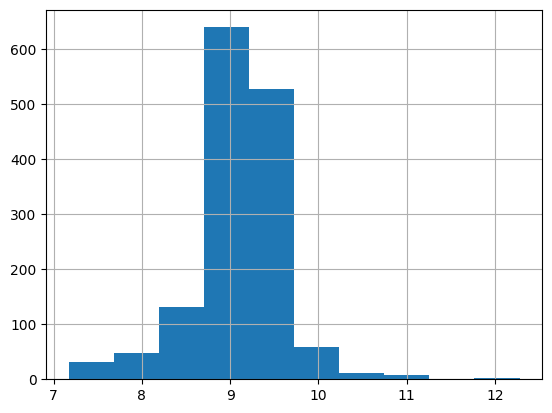

In [29]:
train_df['LotArea_log'].hist()

In [30]:
# Feature engineering - Create new feature (ex: years -> ages)
# First step, select age_features
age_features = [col for col in train_df.columns if 'Yr' in col or 'Year' in col]
age_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [31]:
# Second step, create new features
for df in (train_df, test_df):
  df['sold_age']= df ['YrSold'] - df ['YearBuilt']
  df['remod_age']= df ['YrSold'] - df ['YearRemodAdd']
  df['garage_age']=  df ['YrSold'] - df ['GarageYrBlt']
  df['transaction_age']=  DATASET_YEAR - df ['YrSold']

In [32]:
train_df.shape

(1460, 102)

In [33]:
features = train_df.drop(columns=list(categorical_features)+['Id', target_column]).columns
features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'LotArea_log', 'MasVnrArea_log', 'BsmtFinSF1_log',
       'BsmtFinSF2_log', 'BsmtUnfSF_log', 'TotalBsmtSF_log', '1stFlrSF_log',
       '2ndFlrSF_log', 'LowQualFinSF_log', 'GrLivArea_log', 'GarageArea_log',
       'WoodDeckSF_log', 'OpenPorchSF_log', 'EnclosedPorch_log',
       '3SsnPorch_log', 'ScreenPorch_log', 'PoolArea_log', 'sold_age',
       'remod_age', 'garage_age', 'transaction_age'],
      dtype='object')

In [34]:
# Here are the missing data points
# For now we can drop those columns
na_columns = train_df.isna().sum(axis=0)
na_columns[na_columns!=0]

LotFrontage        259
Alley             1369
MasVnrType           8
MasVnrArea           8
BsmtQual            37
BsmtCond            37
BsmtExposure        38
BsmtFinType1        37
BsmtFinType2        38
Electrical           1
FireplaceQu        690
GarageType          81
GarageYrBlt         81
GarageFinish        81
GarageQual          81
GarageCond          81
PoolQC            1453
Fence             1179
MiscFeature       1406
MasVnrArea_log       8
garage_age          81
dtype: int64

In [35]:
na_columns[na_columns!=0].index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature', 'MasVnrArea_log', 'garage_age'],
      dtype='object')

In [36]:
na_test = test_df[features].isna().sum(axis=0)
missing_in_test_features = na_test[na_test>0].index

In [37]:
train_df = train_df.dropna(axis = 1)

In [38]:
features = [col for col in train_df.columns if col not in ('Id', target_column) and col not in categorical_features and col not in missing_in_test_features ]
features

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotArea_log',
 '1stFlrSF_log',
 '2ndFlrSF_log',
 'LowQualFinSF_log',
 'GrLivArea_log',
 'WoodDeckSF_log',
 'OpenPorchSF_log',
 'EnclosedPorch_log',
 '3SsnPorch_log',
 'ScreenPorch_log',
 'PoolArea_log',
 'sold_age',
 'remod_age',
 'transaction_age']

<Axes: >

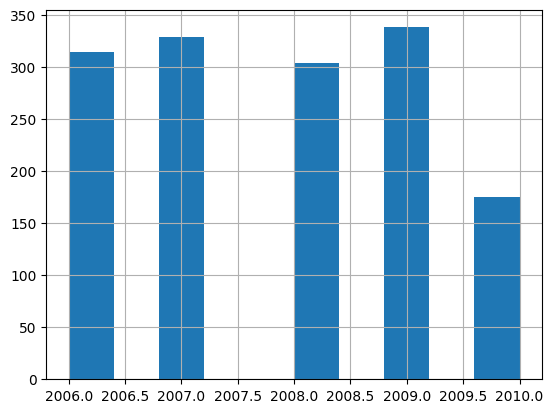

In [39]:
train_df['YrSold'].hist()

<Axes: >

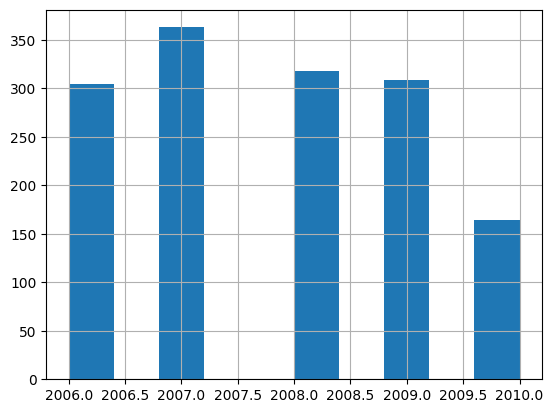

In [40]:
test_df['YrSold'].hist()

In [41]:
train_df[features]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GrLivArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,3SsnPorch_log,ScreenPorch_log,PoolArea_log,sold_age,remod_age,transaction_age
0,60,8450,7,5,2003,2003,856,854,0,1710,...,7.444833,0.000000,4.127134,0.000000,0.0,0.0,0.0,5,5,2
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,7.141245,5.700444,0.000000,0.000000,0.0,0.0,0.0,31,31,3
2,60,11250,7,5,2001,2002,920,866,0,1786,...,7.488294,0.000000,3.761200,0.000000,0.0,0.0,0.0,7,6,2
3,70,9550,7,5,1915,1970,961,756,0,1717,...,7.448916,0.000000,3.583519,5.609472,0.0,0.0,0.0,91,36,4
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,7.695758,5.262690,4.442651,0.000000,0.0,0.0,0.0,8,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,953,694,0,1647,...,7.407318,0.000000,3.713572,0.000000,0.0,0.0,0.0,8,7,3
1456,20,13175,6,6,1978,1988,2073,0,0,2073,...,7.637234,5.857933,0.000000,0.000000,0.0,0.0,0.0,32,22,0
1457,70,9042,7,9,1941,2006,1188,1152,0,2340,...,7.758333,0.000000,4.110874,0.000000,0.0,0.0,0.0,69,4,0
1458,20,9717,5,6,1950,1996,1078,0,0,1078,...,6.983790,5.905362,0.000000,4.727388,0.0,0.0,0.0,60,14,0


In [42]:
# Define a cross validation procedure
# Tips: Use Kfold from SKlearn
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

#linear_model = LinearRegression()
#linear_model = Lasso()
#linear_model = Ridge()
linear_model = ElasticNet(alpha=2.0, l1_ratio=0.7)

for idx_train, idx_val in kf.split(train_df):
  X_train = train_df.loc[idx_train, features]
  y_train =  train_df.loc[idx_train, target_column]
  X_val = train_df.loc[idx_val, features]
  y_val = train_df.loc[idx_val, target_column]
  linear_model = linear_model.fit(X=X_train, y=y_train)
  y_val_pred = linear_model.predict(X_val)
  y_val_pred[y_val_pred<0] =0
  score = mean_squared_log_error(y_true=y_val, y_pred=y_val_pred)
  print(score)

/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.450e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


0.02993994888610628


/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.756e+11, tolerance: 7.213e+08
  model = cd_fast.enet_coordinate_descent(


0.03238950965283547


/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.745e+11, tolerance: 7.595e+08
  model = cd_fast.enet_coordinate_descent(


0.4359382185230972


/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.101e+11, tolerance: 7.373e+08
  model = cd_fast.enet_coordinate_descent(


0.04550101583723031
0.021606342381182322


/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.501e+11, tolerance: 7.682e+08
  model = cd_fast.enet_coordinate_descent(


In [43]:
# Do the same operations using sklearn cross_val_score method

cross_val_score(estimator=ElasticNet(), X=train_df[features], y=train_df[target_column], scoring='neg_mean_squared_log_error')

/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.175e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.458e+11, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/enzo/anaconda3/l

array([-0.02692626,         nan, -0.02965093, -0.04794572, -0.03967746])

In [45]:
# APPENDIX: How to package your model in a Sklearn Pipeline
# Package your model in a pipeline
# https://medium.com/mlearning-ai/neat-data-preprocessing-with-pipeline-and-columntransformer-2a0468865b6b

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer




## BenchMarck des Modèles

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.ensemble import HistGradientBoostingRegressor
from math import sqrt

# Liste de modèles LGBMRegressor, CatBoostRegressor, RandomForestRegressor, Ridge, Lasso, LinearRegression
models = [
    HistGradientBoostingRegressor(max_iter=100, random_state=42),
    ElasticNet(alpha=2.0, l1_ratio=0.7),
    XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42),
    CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0),
    RandomForestRegressor(random_state=42, n_estimators=100),
    Ridge(),
    Lasso(),
    LinearRegression(),
    DecisionTreeClassifier(random_state=42, max_depth=10),
    KNeighborsClassifier(n_neighbors=5),
    SVC()
]

numerical_df = train_df.select_dtypes(include='number')
categorical_df = train_df.select_dtypes(exclude='number')

num_cols = [col for col in numerical_df.columns if col not in ('Id', target_column)]
cat_cols = list(categorical_df.columns)

# Fonction pour choisir le scaler
def get_scaler(model):
    if isinstance(model, (Lasso, Ridge, LinearRegression)):
        return StandardScaler()
    return MinMaxScaler()

# Définir pipelines pour colonnes numériques et catégoriques
for model in models:
    scaler = get_scaler(model)

    num_pipeline = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='mean')),
        ('scale', scaler)
    ])

    cat_pipeline = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    col_trans = ColumnTransformer(transformers=[
        ('num_pipeline', num_pipeline, num_cols),
        ('cat_pipeline', cat_pipeline, cat_cols)
    ], remainder='drop', n_jobs=-1)

    reg_pipeline = Pipeline(steps=[
        ('col_trans', col_trans),
        ('model', model)
    ])

    # Scorer personnalisé
    def custom_msle(y_true, y_pred):
        y_pred = np.clip(y_pred, 0, None)
        return mean_squared_log_error(y_true=y_true, y_pred=y_pred)

    custom_scorer = make_scorer(custom_msle, greater_is_better=False)

    # Cross-validation pour R2
    r2 = cross_val_score(
        estimator=reg_pipeline,
        X=train_df.drop(columns=['Id', target_column]),
        y=train_df[target_column],
        scoring='r2',
        cv=5
    )
    print(f"Model: {model.__class__.__name__}, R2 Mean: {r2.mean():.4f}, r2: {r2}")
    n = len(train_df)
    p = len(num_cols) + len(cat_cols)
    adjusted_r2 = 1 - (1 - r2.mean()) * (n - 1) / (n - p - 1)
    print(f"Model: {model.__class__.__name__}, R2 Mean: {r2.mean():.4f}, Adjusted R2: {adjusted_r2:.4f}")

    # Cross-validation pour MSLE
    msle_score = cross_val_score(
        estimator=reg_pipeline,
        X=train_df.drop(columns=['Id', target_column]),
        y=train_df[target_column],
        scoring=custom_scorer,
        cv=5
    )
    print(f"Model: {model.__class__.__name__}, MSLE Mean: {-msle_score.mean():.4f}")
    rmsle = sqrt(-msle_score.mean())
    print(f"Model: {model.__class__.__name__}, RMSLE: {rmsle:.4f}")


Model: HistGradientBoostingRegressor, R2 Mean: 0.8708, r2: [0.89396527 0.84141681 0.8851065  0.90119438 0.83229186]
Model: HistGradientBoostingRegressor, R2 Mean: 0.8708, Adjusted R2: 0.8634
Model: HistGradientBoostingRegressor, MSLE Mean: 0.0185
Model: HistGradientBoostingRegressor, RMSLE: 0.1361
Model: ElasticNet, R2 Mean: 0.5958, r2: [0.63691784 0.60589317 0.55318623 0.63220574 0.55088077]
Model: ElasticNet, R2 Mean: 0.5958, Adjusted R2: 0.5727
Model: ElasticNet, MSLE Mean: 0.0570
Model: ElasticNet, RMSLE: 0.2387
Model: XGBRegressor, R2 Mean: 0.8856, r2: [0.89722605 0.8459288  0.89395258 0.90528151 0.88578948]
Model: XGBRegressor, R2 Mean: 0.8856, Adjusted R2: 0.8791
Model: XGBRegressor, MSLE Mean: 0.0175
Model: XGBRegressor, RMSLE: 0.1322
Model: CatBoostRegressor, R2 Mean: 0.8922, r2: [0.91507437 0.84214569 0.89316346 0.92782314 0.88286208]
Model: CatBoostRegressor, R2 Mean: 0.8922, Adjusted R2: 0.8860
Model: CatBoostRegressor, MSLE Mean: 0.0151
Model: CatBoostRegressor, RMSLE: 0.1

/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.489e+10, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.789e+10, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Model: Lasso, R2 Mean: 0.8005, r2: [0.90303144 0.76821908 0.79767955 0.87790437 0.65585045]
Model: Lasso, R2 Mean: 0.8005, Adjusted R2: 0.7891


/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.489e+10, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.789e+10, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Model: Lasso, MSLE Mean: 0.2235
Model: Lasso, RMSLE: 0.4727
Model: LinearRegression, R2 Mean: -74442908001583677440.0000, r2: [-3.40132321e+16 -7.97776375e+18 -1.12770289e+17 -3.60253949e+20
 -3.83604407e+18]
Model: LinearRegression, R2 Mean: -74442908001583677440.0000, Adjusted R2: -78704494763993186304.0000
Model: LinearRegression, MSLE Mean: 5.4766
Model: LinearRegression, RMSLE: 2.3402


/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model: DecisionTreeClassifier, R2 Mean: 0.3895, r2: [0.26966912 0.2228546  0.56630336 0.43109456 0.45739771]
Model: DecisionTreeClassifier, R2 Mean: 0.3895, Adjusted R2: 0.3545


/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model: DecisionTreeClassifier, MSLE Mean: 0.0864
Model: DecisionTreeClassifier, RMSLE: 0.2940


/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model: KNeighborsClassifier, R2 Mean: 0.3225, r2: [0.34598433 0.29918506 0.32534535 0.31859278 0.32325347]
Model: KNeighborsClassifier, R2 Mean: 0.3225, Adjusted R2: 0.2837


/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model: KNeighborsClassifier, MSLE Mean: 0.1101
Model: KNeighborsClassifier, RMSLE: 0.3318


/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model: SVC, R2 Mean: 0.1569, r2: [ 0.23330244  0.12859733 -0.02090552  0.24175899  0.20177667]
Model: SVC, R2 Mean: 0.1569, Adjusted R2: 0.1086


/Users/enzo/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model: SVC, MSLE Mean: 0.1189
Model: SVC, RMSLE: 0.3448


## Test des Modèles avec les meilleur résultat en supprimant les valeurs extrême, en ajoutant des données

In [ ]:
#train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

In [ ]:
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['TotalBsmtSF']
train_df['TotalBath'] = train_df['FullBath'] + (0.5 * train_df['HalfBath'])

train_df['HouseAge'] = 2024 - train_df['YearBuilt']
train_df['RemodAge'] = 2024 - train_df['YearRemodAdd']

test_df['TotalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['TotalBsmtSF']
test_df['TotalBath'] = test_df['FullBath'] + (0.5 * test_df['HalfBath'])
test_df['HouseAge'] = 2024 - test_df['YearBuilt']
test_df['RemodAge'] = 2024 - test_df['YearRemodAdd']

numerical_df = train_df.select_dtypes(include='number')
categorical_df = train_df.select_dtypes(exclude='number')

Q1 = train_df['SalePrice'].quantile(0.25)
Q3 = train_df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[~((train_df['SalePrice'] < (Q1 - 1.5 * IQR)) | (train_df['SalePrice'] > (Q3 + 1.5 * IQR)))]


num_cols = [col for col in numerical_df.columns if col not in ('Id', target_column)]
cat_cols = list(categorical_df.columns)

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore'))
])


col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)

mlr = CatBoostRegressor(iterations=1000,learning_rate=0.02,depth=6,verbose=0,random_state=RANDOM_STATE)

reg_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', mlr)
])

def custom_msle(y_true, y_pred):
    y_pred = np.clip(y_pred, 0, None)
    return mean_squared_log_error(y_true=y_true, y_pred=y_pred)

r2 = sklearn.model_selection.cross_val_score(estimator=reg_pipeline,
                                             X=train_df.drop(columns=['Id', target_column]),
                                             y=train_df[target_column],
                                             scoring='r2'
                                             )

# Affichage du score R2
print("R2 Score:", r2)
print("R2 Score Mean:", r2.mean())

msle_score = sklearn.model_selection.cross_val_score(estimator=reg_pipeline,
                                                     X=train_df.drop(columns=['Id', target_column]),
                                                     y=train_df[target_column],
                                                     scoring=sklearn.metrics.make_scorer(custom_msle, greater_is_better=False)
                                                     )

print(f"Model: {mlr.__class__.__name__}, MSLE Mean: {-msle_score.mean():.4f}")
rmsle = sqrt(-msle_score.mean())
print(f"Model: {mlr.__class__.__name__}, RMSLE: {rmsle:.4f}")

R2 Score: [0.90906358 0.91306661 0.90750678 0.92571961 0.89024243]
R2 Score Mean: 0.9091198015194258
Model: CatBoostRegressor, MSLE Mean: 0.0128
Model: CatBoostRegressor, RMSLE: 0.1132


## Résulat non concluant

In [ ]:
def feature_engineering(df):
    """
    Applique toutes les transformations nécessaires au dataset.
    :param df: DataFrame d'entrée
    :return: DataFrame transformé
    """
    df = df.copy()  # Travailler sur une copie pour éviter d'altérer l'original
    
    # Transformations logarithmiques pour gérer les distributions asymétriques
    log_columns = [
        'TotalBsmtSF', 'BsmtUnfSF', 'OpenPorchSF', 'GrLivArea', '1stFlrSF',
        'ScreenPorch', 'GarageArea', 'PoolArea', 'BsmtFinSF2', 'EnclosedPorch',
        '2ndFlrSF', 'BsmtFinSF1', 'LowQualFinSF', 'LotArea', '3SsnPorch', 'WoodDeckSF'
    ]
    for col in log_columns:
        if col in df.columns:
            df[f"{col}_log"] = np.log1p(df[col])  # log1p pour éviter les erreurs sur les valeurs nulles

    # Calculer les âges des maisons
    if 'YearBuilt' in df.columns:
        df['sold_age'] = 2024 - df['YearBuilt']
    if 'YearRemodAdd' in df.columns:
        df['remod_age'] = 2024 - df['YearRemodAdd']
    if 'YrSold' in df.columns:
        df['transaction_age'] = 2024 - df['YrSold']

    # Imputation des valeurs manquantes (NaN)
    # Pour les colonnes numériques
    for col in df.select_dtypes(include='number').columns:
        df[col].fillna(df[col].median(), inplace=True)  # Remplace les NaN par la médiane

    # Pour les colonnes catégoriques
    for col in df.select_dtypes(exclude='number').columns:
        df[col].fillna('Missing', inplace=True)  # Remplace les NaN par une catégorie 'Missing'

    # Encodage des variables catégoriques (si nécessaire)
    # Par exemple, un encodage labelisé pour certaines colonnes catégoriques
    categorical_cols = ['Neighborhood', 'Condition1', 'Condition2']  # Exemple
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype('category').cat.codes

    return df

# Appliquer les transformations au jeu d'entraînement et de test
train_df = feature_engineering(train_df)
test_df = feature_engineering(test_df)


## Test d'un Stacking de modèle performant

In [48]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

# Séparation des colonnes numériques et catégoriques
numerical_df = train_df.select_dtypes(include='number')
categorical_df = train_df.select_dtypes(exclude='number')


num_cols = [col for col in numerical_df.columns if col not in ('Id', target_column)]
cat_cols = list(categorical_df.columns)

# Pipeline pour les colonnes numériques
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

# Pipeline pour les colonnes catégoriques
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))
])

# Transformation des colonnes
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
], remainder='drop', n_jobs=-1)

# Modèles de base pour le stacking
base_models = [
    ('lgbm', LGBMRegressor(n_estimators=200, learning_rate=0.05)),
    ('catboost', CatBoostRegressor(n_estimators=200, learning_rate=0.05, verbose=0)),
    ('ridge', Ridge(alpha=0.1)),
    ('rf', RandomForestRegressor(n_estimators=100))
]

# Modèle final
final_model = LinearRegression()

# Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=final_model, cv=5)

# Pipeline complet
reg_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', stacking_model)
])

# Définir une fonction personnalisée pour MSLE
def custom_msle(y_true, y_pred):
    y_pred = np.clip(y_pred, 0, None)
    return mean_squared_log_error(y_true=y_true, y_pred=y_pred)

# Évaluation avec le R²
r2 = cross_val_score(estimator=reg_pipeline,
                     X=train_df.drop(columns=['Id', target_column]),
                     y=train_df[target_column],
                     scoring='r2'
                     )
print("R2 Score:", r2)
print("R2 Score Mean:", r2.mean())

# Évaluation avec MSLE
msle_score = cross_val_score(estimator=reg_pipeline,
                             X=train_df.drop(columns=['Id', target_column]),
                             y=train_df[target_column],
                             scoring=make_scorer(custom_msle, greater_is_better=False)
                             )
print(f"Model: StackingRegressor, MSLE Mean: {-msle_score.mean():.4f}")
rmsle = np.sqrt(-msle_score.mean())
print(f"Model: StackingRegressor, RMSLE: {rmsle:.4f}")

# Ajustement du pipeline pour faire des prédictions
reg_pipeline.fit(train_df.drop(columns=['Id', target_column]), train_df[target_column])
predictions = reg_pipeline.predict(test_df.drop(columns=['Id']))

# Exporter les prédictions
output_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predictions
})
output_df.to_csv('../Data/Predict/stacking_predictions.csv', index=False)
print("Prédictions exportées dans 'stacking_predictions.csv'")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5217
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 149
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4920
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 135
[LightGBM] [Info] Start training from score 179921.700214
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

## Résultat non concluant : les scores ne sont pas améliorer

## Représentation graphique pour verifier l'absence d'overfitting

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1215
[LightGBM] [Info] Number of da

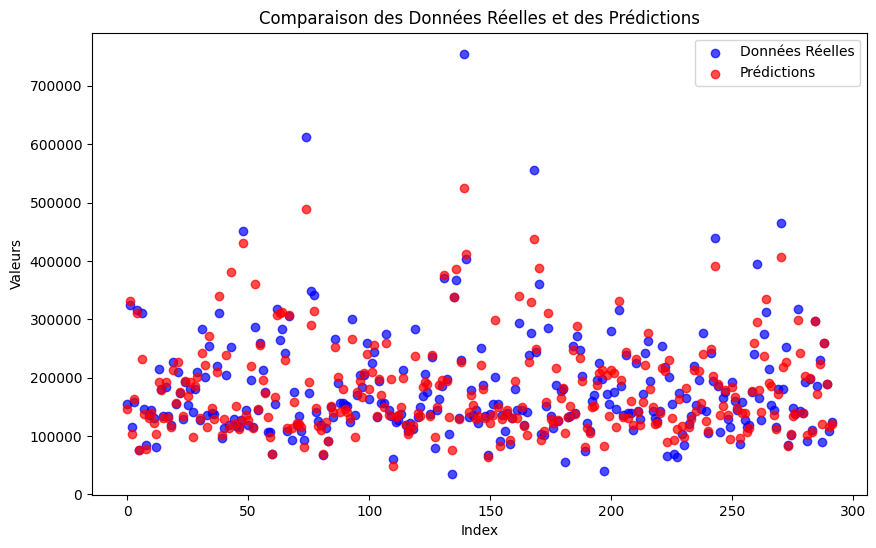

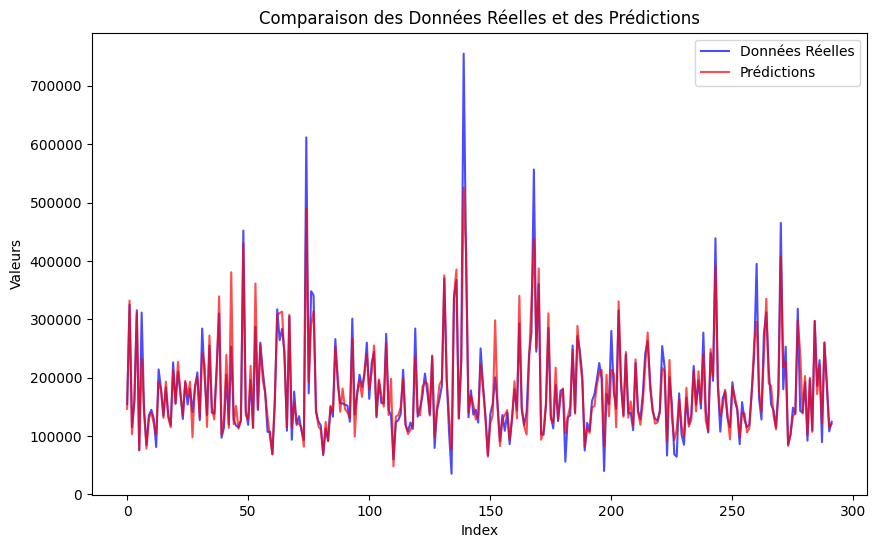

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Exemple de chargement des données
# Remplace par tes propres données
data = pd.read_csv('content/train.csv')
target_column = 'SalePrice'
X = data.drop(columns=['Id', target_column])  # Supposons que 'Id' est inutile
y = data[target_column]

# Encoder les variables catégoriques
cat_cols = X.select_dtypes(include='object').columns
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle CatBoost
model = LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                            feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Calculer l'erreur pour évaluer les performances
mse = mean_squared_error(y_test, y_pred)
rmsle = np.sqrt(-msle_score.mean())
print(f"Squarred Mean Squared Error (RMSE): {rmsle:.4f}")

# Tracer les données réelles vs les prédictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Données Réelles", alpha=0.7, color='blue')
plt.scatter(range(len(y_pred)), y_pred, label="Prédictions", alpha=0.7, color='red')
plt.title("Comparaison des Données Réelles et des Prédictions")
plt.xlabel("Index")
plt.ylabel("Valeurs")
plt.legend()
plt.show()

# Tracer les données réelles vs les prédictions
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Données Réelles", alpha=0.7, color='blue')
plt.plot(range(len(y_pred)), y_pred, label="Prédictions", alpha=0.7, color='red')
plt.title("Comparaison des Données Réelles et des Prédictions")
plt.xlabel("Index")
plt.ylabel("Valeurs")
plt.legend()
plt.show()


In [ ]:
reg_pipeline

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['MSSubClass', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath...
                                                              learning_rate=0.035,
                                                              max_bin=50,
                                                              n_estimators=2177,
                                                              n_jobs=-1,
                                                              num_leaves=5,
                                                              objective='regression')),
                                               ('catboost',
                                                <catboost.core.CatBoostRegressor object at 0x28a167850>),
                                               ('rf',
                                                RandomForestRegressor(random_state=42)),
                                               ('ridge', Ridge()),
                                               ('lasso', Lasso(alpha=0.1)),
                                               ('elasticnet',
                                                ElasticNet(alpha=2.0,
                                                           l1_ratio=0.7))],
                                   final_estimator=ExtraTreesRegressor(n_estimators=50)))])

# Modèle final choisi

In [49]:
numerical_df = train_df.select_dtypes(include='number')
categorical_df = train_df.select_dtypes(exclude='number')

num_cols = [col for col in numerical_df.columns if col not in ('Id', target_column)]
cat_cols = list(categorical_df.columns)

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore'))
])


col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)

mlr = LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                        feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)

reg_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', mlr)
])

def custom_msle(y_true, y_pred):
    y_pred = np.clip(y_pred, 0, None)
    return mean_squared_log_error(y_true=y_true, y_pred=y_pred)

r2 = sklearn.model_selection.cross_val_score(estimator=reg_pipeline,
                                             X=train_df.drop(columns=['Id', target_column]),
                                             y=train_df[target_column],
                                             scoring='r2'
                                             )

# Affichage du score R2
print("R2 Score:", r2)
print("R2 Score Mean:", r2.mean())

msle_score = sklearn.model_selection.cross_val_score(estimator=reg_pipeline,
                                                     X=train_df.drop(columns=['Id', target_column]),
                                                     y=train_df[target_column],
                                                     scoring=sklearn.metrics.make_scorer(custom_msle, greater_is_better=False)
                                                     )

print(f"Model: {mlr.__class__.__name__}, MSLE Mean: {-msle_score.mean():.4f}")
rmsle = sqrt(-msle_score.mean())
print(f"Model: {mlr.__class__.__name__}, RMSLE: {rmsle:.4f}")

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1765
[LightGBM] [Info] Number of da

## Enregistrement des données prédites

In [51]:
# Ajuster le pipeline sur les données d'entraînement
X_train = train_df.drop(columns=['Id', target_column])
y_train = train_df[target_column]

reg_pipeline.fit(X_train, y_train)

X_test = test_df.drop(columns=['Id'])  # Supprime la colonne Id
predictions = reg_pipeline.predict(X_test)


output_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predictions
})
output_df.to_csv('../Data/Predict/LGMRpredictions.csv', index=False)
print("Prédictions exportées dans 'LGMRpredictions.csv'")



[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1830
[LightGBM] [Info] Number of da